In [1]:
# Include this on top, as the first import 
# This must always be imported first. If you are restarting the notebook
# don't forget to run this cell first!
import allow_local_imports

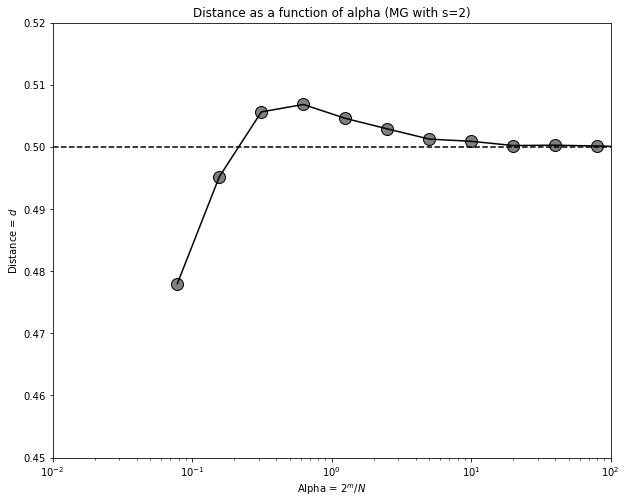

In [2]:
from lib.minority_game import MinorityGame
from lib.agents.agent import Agent
from lib.agents.factory import AgentFactory
from lib.strategies import DefaultStrategy
from lib.memory import UniformMemoryGenerator
from numpy.random import default_rng
import matplotlib.pyplot as plt

# Calculate the distance of best strategies

N = 51
alpha_graph = []
dist_graph = []
n_realizations = 20
rng = default_rng(0)

for m in range(2, 14):
    dist = 0
    for r in range(n_realizations):
        game = MinorityGame(
            n_agents=51,
            factory_dict={
                # Distance calculation also works with multiple agent groups...
                1: AgentFactory(
                    Agent,
                    agent_kwargs=dict(strategy_clss=[DefaultStrategy, DefaultStrategy]),
                    memory_generator=UniformMemoryGenerator(m=m)
                )
            },
            rng=rng
        )
        _, attendances, _, _ = game.simulate_game(max_steps=500)

        # in order to create the graph
        dist += game.total_strategy_distance()
    
    alpha = 2**m/51
    alpha_graph.append(alpha)
    dist_graph.append(dist/n_realizations)

# everything in one graph
fig, ax = plt.subplots(figsize=(10, 8))

ax.axhline(y=0.5, color="k", linestyle="--") # vol = 1 -> randomness

ax.scatter(alpha_graph, dist_graph, c="gray", edgecolors="k", marker="o", s=12**2)
ax.plot(alpha_graph, dist_graph, color="k")


ax.set_xlabel("Alpha = $2^m/N$")
ax.set_ylabel("Distance = $d$")

plt.title("Distance as a function of alpha (MG with s=2)")
plt.xscale('log')
plt.xlim([0.01,100])
plt.ylim([0.45, 0.52])

plt.show()
